In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [10]:
# def return_time(file)
root = "results"
print(sorted(os.listdir(root)))
for exp_type in sorted(os.listdir(root)):
    for sf in os.listdir(os.path.join(root, exp_type)):
        for f in os.listdir(os.path.join(root, exp_type, sf)):
            print(os.path.join(root,exp_type, sf, f))

['lane', 'msbfs', 'thread']
results/lane/1/fullquery_128_1000_1000000_2.out
results/lane/1/fullquery_256_1000_1000000_16.out
results/lane/1/fullquery_64_1000_1000000_8.out
results/lane/1/fullquery_16_1000_1000000_2.out
results/lane/1/msbfs_256_1000_1000000_8.out
results/lane/1/msbfs_16_1000_1000000_12.out
results/lane/1/fullquery_16_1000_1000000_1.out
results/lane/1/msbfs_512_1000_1000000_1.out
results/lane/1/fullquery_512_1000_1000000_2.out
results/lane/1/msbfs_8_1000_1000000_4.out
results/lane/1/fullquery_512_1000_1000000_12.out
results/lane/1/msbfs_128_1000_1000000_16.out
results/lane/1/msbfs_32_1000_1000000_12.out
results/lane/1/fullquery_512_1000_1000000_4.out
results/lane/1/msbfs_32_1000_1000000_1.out
results/lane/1/msbfs_8_1000_1000000_16.out
results/lane/1/msbfs_16_1000_1000000_16.out
results/lane/1/msbfs_256_1000_1000000_1.out
results/lane/1/fullquery_32_1000_1000000_4.out
results/lane/1/msbfs_512_1000_1000000_8.out
results/lane/1/fullquery_8_1000_1000000_1.out
results/lane/1/

In [13]:
result_df = pd.DataFrame(columns=["exp_type", "file", "sf", "lane_count", "vertex_count", "edge_count", "thread_count", "run", "time"])

root = "results"
incorrect_cnt = 0
curr_dir = []
for exp_type in sorted(os.listdir(root)):
    print(exp_type)
    for sf in os.listdir(os.path.join(root, exp_type)):
        for f in os.listdir(os.path.join(root, exp_type, sf)):
            with open(os.path.join(root,exp_type, sf, f)) as output_file:
                f_list = f.split("_")
                
                file = f_list[0]
                lane = f_list[1]
                v_cnt = f_list[2]
                e_cnt = f_list[3]
                if len(f_list) == 5:
                    thread = f_list[4].split(".")[0]
                    run = -1
                elif len(f_list) == 6:
                    thread = f_list[4]
                    run = f_list[5].split(".")[0]
                for time in output_file.readlines():
                    if time.strip() == 'TIMEOUT':
#                         print(time_cpy)
                        time_cpy = 30
                    elif time.strip() == 'INCORRECT':
#                         print(time_cpy)
#                         time_cpy = 30
                        print(exp_type, file, sf, lane, thread)
                        incorrect_cnt = incorrect_cnt + 1
                        continue
                    else:
                        time_cpy = round(float(time.strip()), 3)
                    result_df.loc[len(result_df.index)] = [exp_type, file, sf, int(lane), v_cnt, e_cnt, int(thread), int(run), time_cpy]
# result_df.columns = 
    # get experiment config
#     with open(os.path.join(root, f, "config.json")) as config_file:

lane
lane fullquery 30 16 2
lane fullquery 30 128 4
lane fullquery 30 8 8
lane fullquery 30 32 8
lane fullquery 30 64 16
lane fullquery 30 64 2
lane fullquery 10 16 2
lane fullquery 10 128 4
msbfs
thread


In [4]:
incorrect_cnt

8

In [14]:
result_df

,exp_type,file,sf,lane_count,vertex_count,edge_count,thread_count,run,time
0,lane,fullquery,1,128,1000,1000000,2,-1,0.278
1,lane,fullquery,1,128,1000,1000000,2,-1,0.308
2,lane,fullquery,1,128,1000,1000000,2,-1,0.270
3,lane,fullquery,1,128,1000,1000000,2,-1,0.270
4,lane,fullquery,1,128,1000,1000000,2,-1,0.271
...,...,...,...,...,...,...,...,...,...
2959,thread,fullquery,10,64,1000,1000000,2,-1,18.640
2960,thread,fullquery,10,64,1000,1000000,2,-1,18.689
2961,thread,fullquery,10,64,1000,1000000,2,-1,18.338
2962,thread,fullquery,10,64,1000,1000000,2,-1,18.338


In [6]:
fullquery_df = result_df[result_df["file"] == "fullquery"]

In [39]:
result_df["variant_divisor"] = result_df["lane_count"]

In [7]:
### thread plots
thread_df = result_df[result_df["exp_type"] == "thread" ]


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

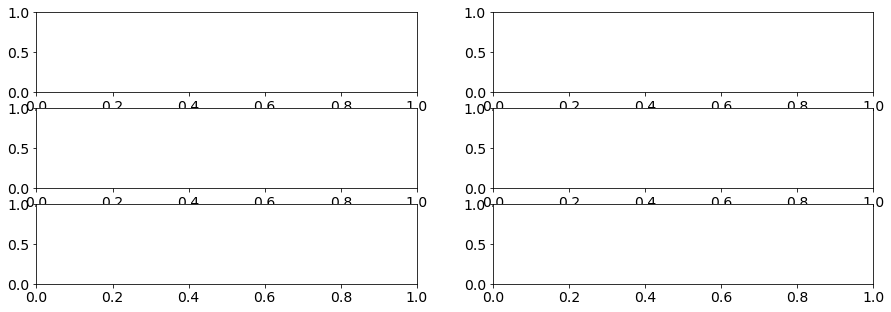

In [48]:
# thread_e_v_df = thread_df[thread_df["file"] != "msbfs"]
fig, axes = plt.subplots(3, 2, figsize=(15, 5))
axes

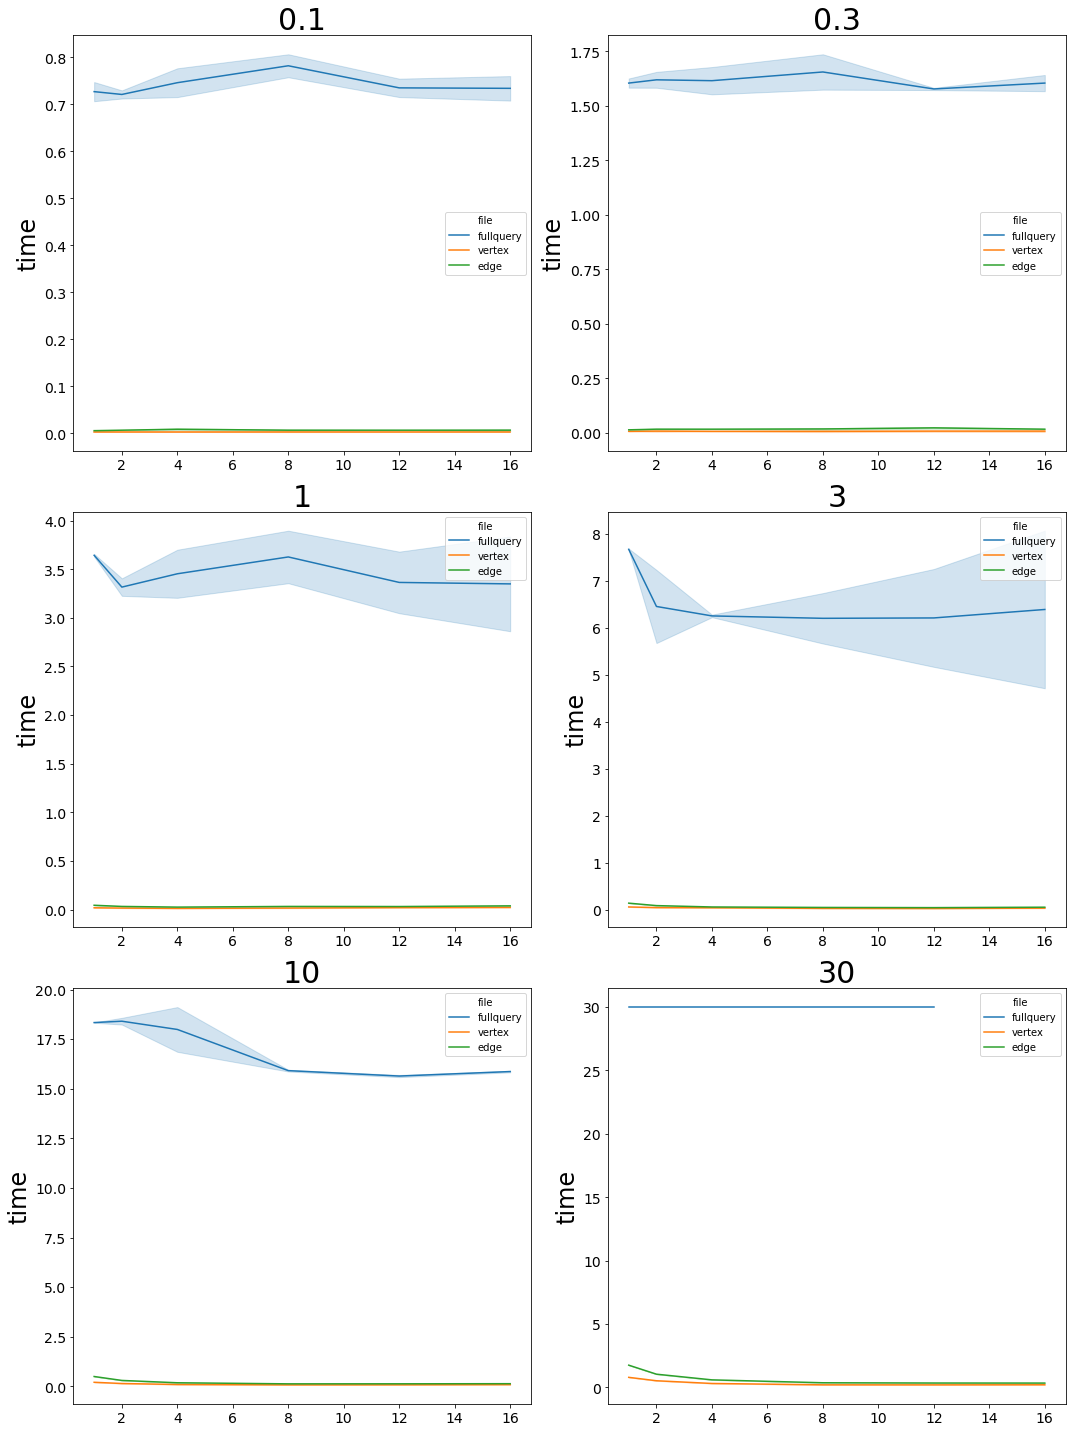

In [8]:
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

fig, axes = plt.subplots(3, 2, figsize=(15, 20))
thread_create_csr_df = thread_df[thread_df["file"] != "msbfs"]
sf_list = list(set(result_df["sf"]))
sf_list = sorted(sf_list, key=float)

# for i in range(len(sf_list)):
count = 0
for i in range(3):
    for j in range(2):
        
        temp_df = thread_create_csr_df[thread_create_csr_df["sf"] == sf_list[count]]
        l = sns.lineplot(ax = axes[i][j], x="thread_count", y= "time" , hue="file", ci="sd", data=temp_df, estimator=np.median)
        l.set_title(sf_list[count],fontdict = { 'fontsize': 30})
        l.set(xlabel = None)
#         t.set( xlabel=None)
        count = count + 1
fig.tight_layout()
plt.show()


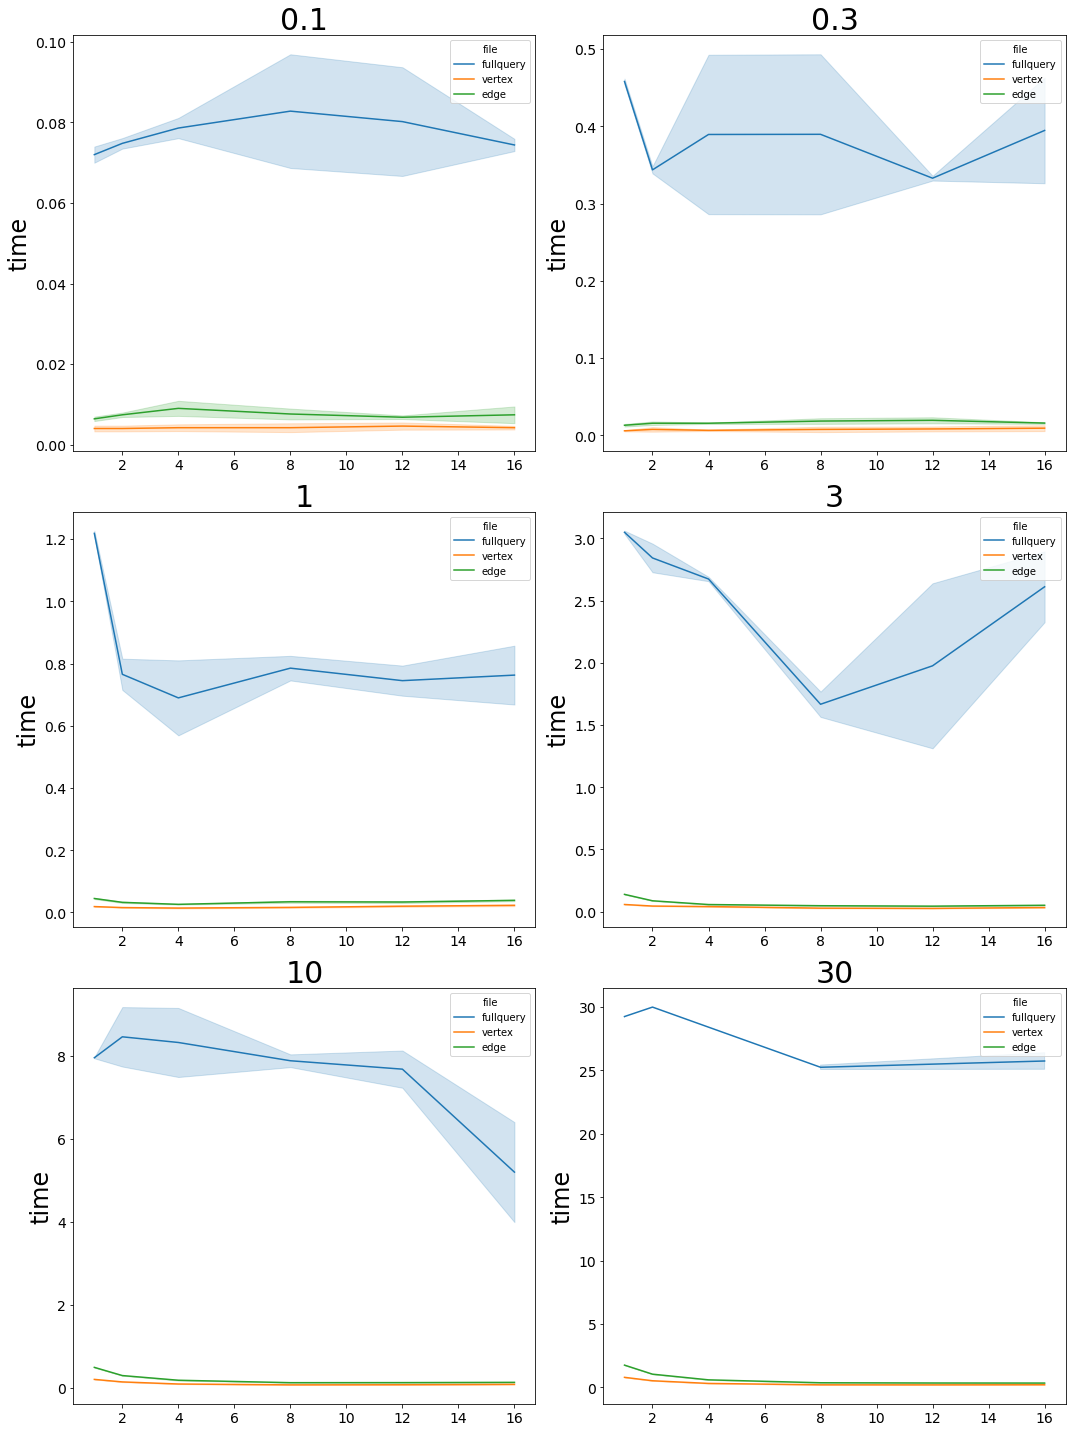

In [11]:
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

fig, axes = plt.subplots(3, 2, figsize=(15, 20))
thread_create_csr_df = thread_df[thread_df["file"] != "msbfs"]
sf_list = list(set(result_df["sf"]))
sf_list = sorted(sf_list, key=float)

# for i in range(len(sf_list)):
count = 0
for i in range(3):
    for j in range(2):
        
        temp_df = thread_create_csr_df[thread_create_csr_df["sf"] == sf_list[count]]
        l = sns.lineplot(ax = axes[i][j], x="thread_count", y= "time" , hue="file", ci="sd", data=temp_df)
        l.set_title(sf_list[count],fontdict = { 'fontsize': 30})
        l.set(xlabel = None)
#         t.set( xlabel=None)
        count = count + 1
fig.tight_layout()
plt.show()


In [13]:

def plot_thread(data_df, sf_list, x="thread_count", hue="file"):
    count = 0
    for i in range(3):
        for j in range(2):
            temp_df = data_df[data_df["sf"] == sf_list[count]]
            print(sf_list[count])
            l = sns.lineplot(ax = axes[i][j], x=x, y= "time" , hue=hue, ci="sd", data=temp_df, estimator=np.median )
            l.set_title(sf_list[count],fontdict = { 'fontsize': 30})
            l.set(xlabel = None)
            count = count + 1


0.1
0.3
1
3
10
30


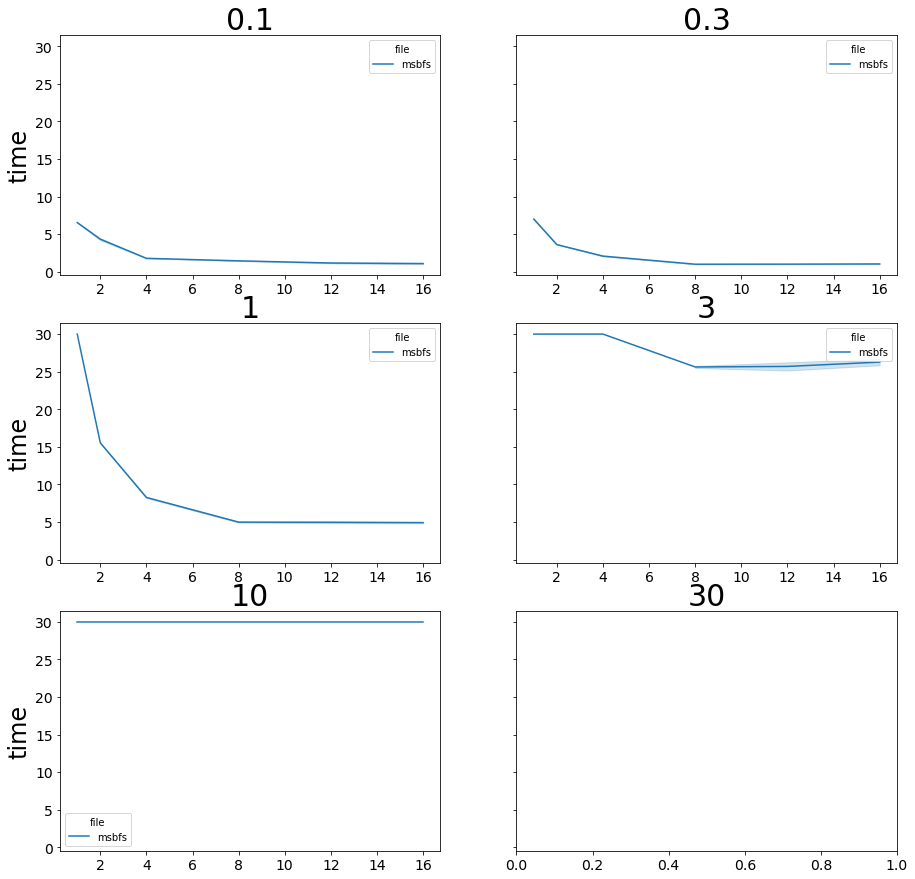

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
msbfs_df = thread_df[thread_df['file'] == "msbfs"] 
plot_thread(msbfs_df, sf_list)


In [64]:
sf_list

['10', '0.1', '3', '0.3', '1']

0.1


(0.0, 0.006)

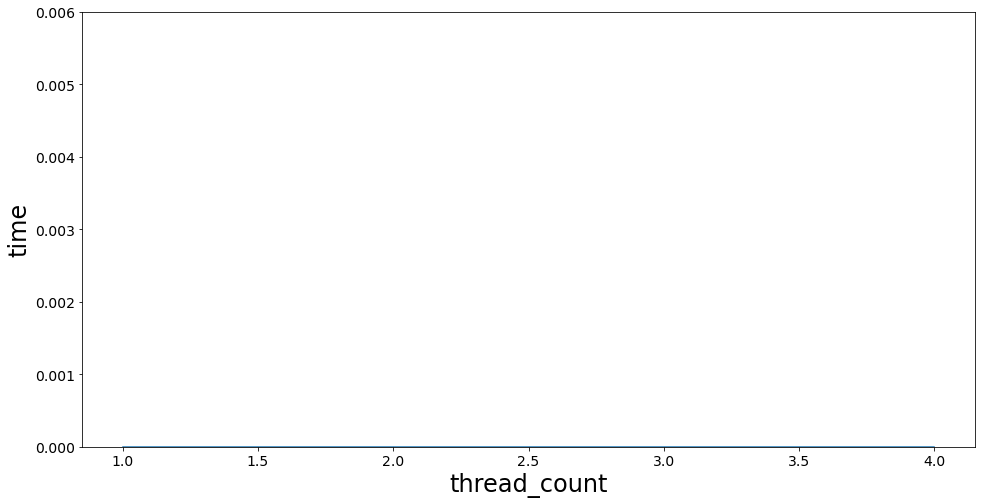

In [33]:
# i = 0
# print(sf_list[i])
# vertex_df = thread_df[thread_df['file'] == "vertex"]
# temp_df = vertex_df[vertex_df["sf"] == sf_list[i]]
# sns.lineplot(x="thread_count", y= "time" , ci="sd", data=temp_df, )
# plt.ylim([0, 0.006])



In [34]:
# lane_df = result_df[result_df["exp_type"] == "lane"]

0.1
0.3
1
3
10
30


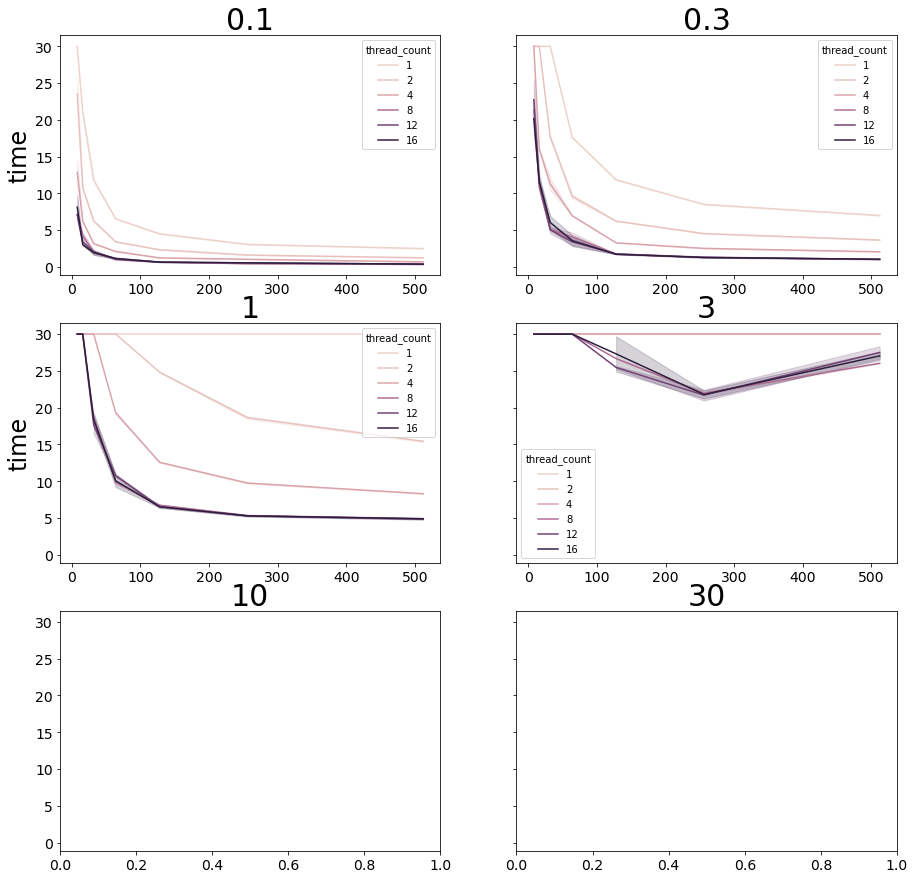

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
lane_df = result_df[result_df["exp_type"] == "lane"]
plot_thread(lane_df, sf_list, x="lane_count", hue="thread_count")

# g = sns.lineplot(x="lane_count", y= "time" , hue="thread_count", ci="sd", data=lane_df )
# g.set_xticks([8, 16, 32, 64, 128, 256, 512])

0.1
0.3
1
3
10
30


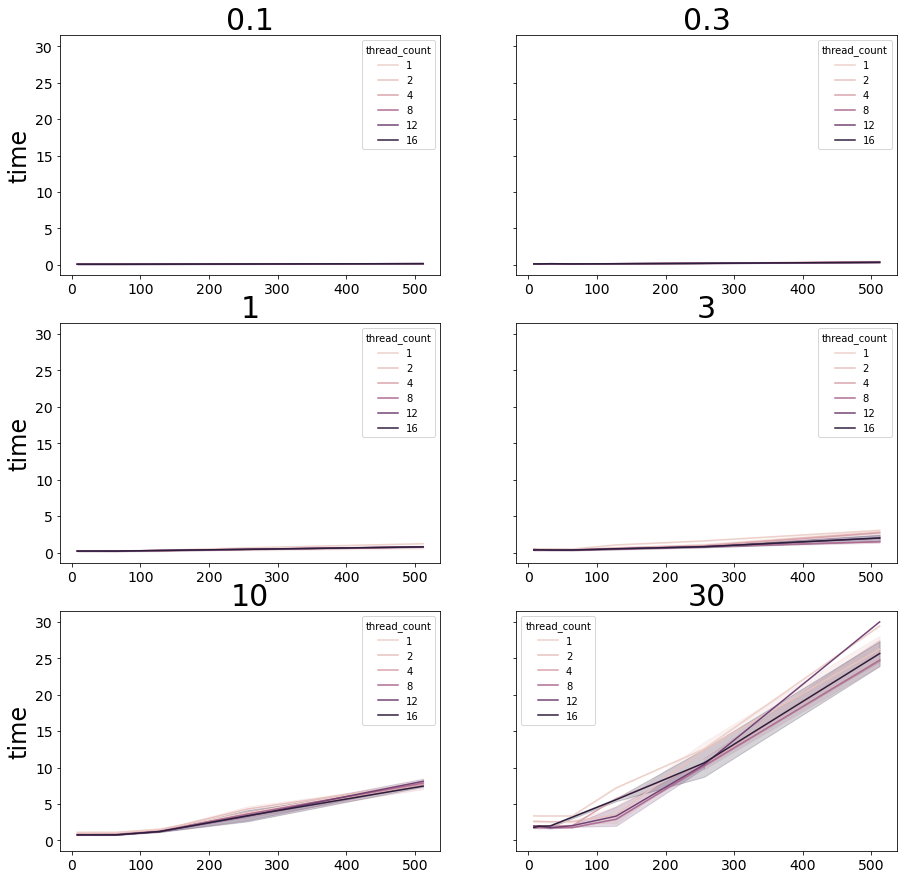

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
lane_df = fullquery_df[fullquery_df["exp_type"] == "lane"]
plot_thread(lane_df, sf_list, x="lane_count", hue="thread_count")

In [27]:
sf_30_df = lane_df[lane_df["sf"] == "30"]
temp_df = sf_30_df[sf_30_df["thread_count"] == 12]
# lane_df["sf"].value_counts()

In [29]:
sf_30_df[sf_30_df["thread_count"] == 12]

,exp_type,file,sf,lane_count,vertex_count,edge_count,thread_count,time
1181,lane,fullquery,30,512,1000,1000000,12,30.000
1210,lane,fullquery,30,64,1000,1000000,12,2.011
1211,lane,fullquery,30,64,1000,1000000,12,1.786
1212,lane,fullquery,30,64,1000,1000000,12,1.799
1213,lane,fullquery,30,64,1000,1000000,12,2.151
1214,lane,fullquery,30,64,1000,1000000,12,2.030
1215,lane,fullquery,30,256,1000,1000000,12,10.343
1216,lane,fullquery,30,256,1000,1000000,12,10.396
1217,lane,fullquery,30,256,1000,1000000,12,10.419
1218,lane,fullquery,30,256,1000,1000000,12,10.377


In [40]:
variant_df = result_df[result_df["exp_type"] == "msbfs"]
variant_df
# sns.lineplot(x="lane_count", y= "time" , hue="thread_count", ci="sd", data=lane_df )

,exp_type,file,sf,lane_count,vertex_count,edge_count,thread_count,time,variant_divisor
598,msbfs,msbfs,1,4,1000,1000000,12,9.981,4
599,msbfs,msbfs,1,4,1000,1000000,12,10.458,4
600,msbfs,msbfs,1,4,1000,1000000,12,9.695,4
601,msbfs,msbfs,1,4,1000,1000000,12,10.060,4
602,msbfs,msbfs,1,4,1000,1000000,12,10.216,4
...,...,...,...,...,...,...,...,...,...
957,msbfs,msbfs,10,1,1000,1000000,4,30.000,1
958,msbfs,msbfs,10,1,1000,1000000,1,30.000,1
959,msbfs,msbfs,10,3,1000,1000000,2,30.000,3
960,msbfs,msbfs,10,3,1000,1000000,4,30.000,3


0.1
0.3
1
3
10
30


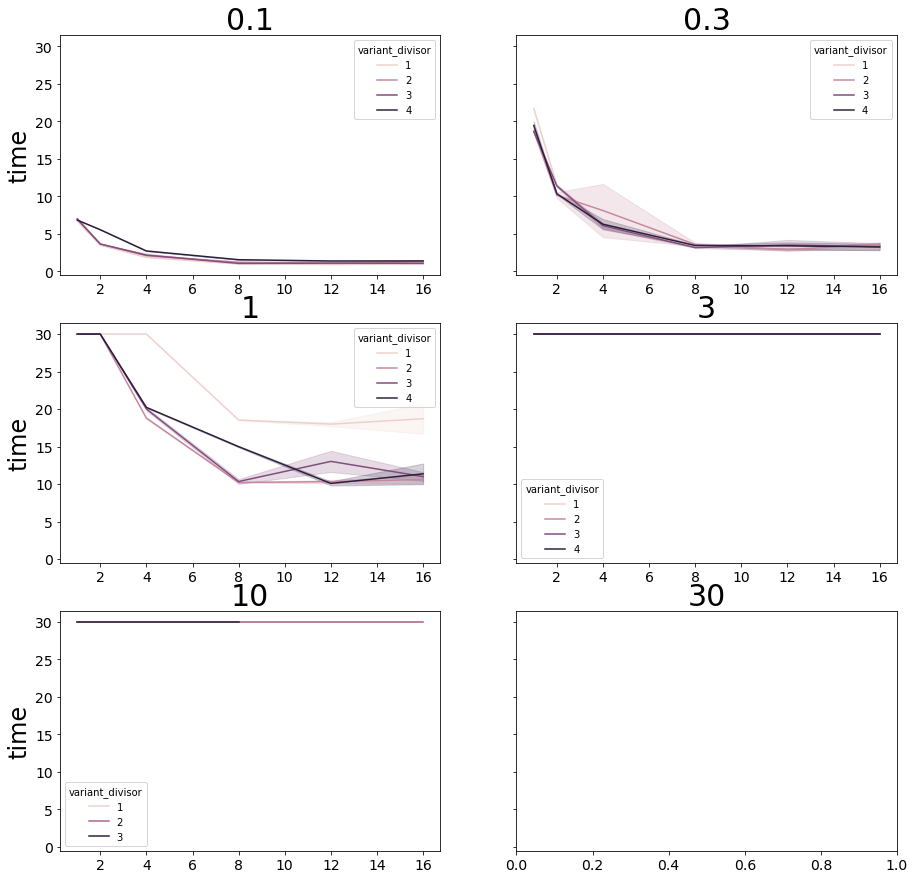

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
plot_thread(variant_df, sf_list, x="thread_count", hue="variant_divisor")

0.1
0.3
1
3
10
30


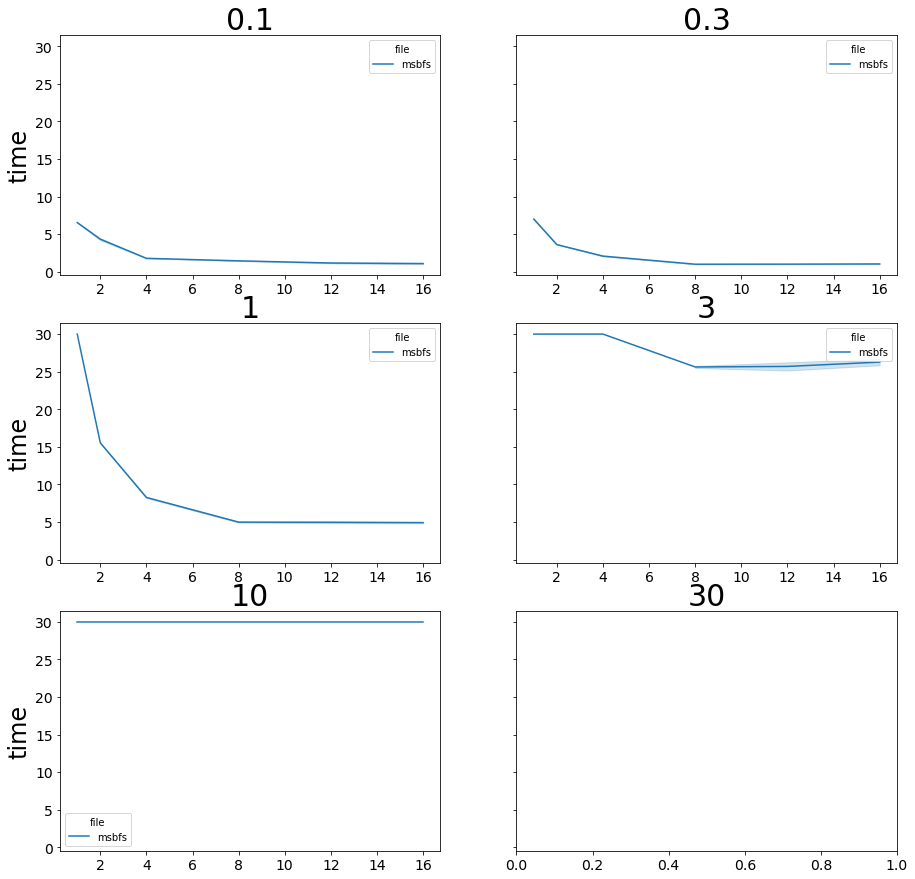

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
msbfs_df = thread_df[thread_df['file'] == "msbfs"] 
plot_thread(msbfs_df, sf_list)


In [85]:
# debug_df =pd.DataFrame(columns=[ "sf", "lane_count", "variant", "thread_count", "func_call", "run",  "batch_size", "batch_index", "iter", "vector_size", "bfs_time", "full_time", "init_time"])

result_list = []
# root = "debug/test_plot"

root = "debug/full_1"
# print(sorted(os.listdir(root)))
for file in sorted(os.listdir(root)):
    with open(os.path.join(root,file)) as f:
        lines = f.readlines()
        name_list = file.split("_")
        sf = name_list[0][len("sf"):]
        lane = name_list[1][len("lane"):]
        thread = name_list[2][len("thread"):]
        variant = name_list[3][len("variant"):]
        run = name_list[4][len("run")].split(".")[0]
        total_time = 0.0
        bfs_time_list = []
        vector_size = 0
#         iter = 0
        func_call = 1
        init_time = 0.0
        batch_index = 0
        bfs_dict = {}
        curr_iter = 0
#         it = 0
        print(len(lines))
        for line in lines:
            if "Args size" in line:
                it = 0
                vector_size = int(line.split()[-1])
            elif "Init time" in line:
                bfs_dict[batch_index] = dict()
                bfs_dict[batch_index]["init_time"] = float(line.split()[-1])
#                 init_time =     
            elif "BFS" in line:
                line_time = float(line.split()[-1])
                if "bfs" in bfs_dict[batch_index].keys():
                    bfs_dict[batch_index]["bfs"].append(line_time)
                    curr_iter = curr_iter + 1
                else:
                    bfs_dict[batch_index]["bfs"] = [line_time]
                    curr_iter = 0
                if curr_iter != it:
                    print("Mismatch "  )
#                         [sf, int(lane), variant, int(thread), int(call), it, vector_size, bfs_time, total_time]
            elif "Iter" in line:
                it = int(line.split()[-1])
            elif "Batch size" in line:
                bfs_dict[batch_index]["batch_size"] = int(line.split()[-1])
                batch_index = batch_index + 1
            
#                     bfs_time_list.append(line.split()[-1])
            elif "program" in line:
                total_time = float(line.split()[-1])
                for k,v in bfs_dict.items():
#                                                         [ "sf", "lane_count", "variant", "thread_count", "query_run", "batch_size", "batch_index", "iter", "vector_size", "bfs_time", "full_time", "init_time"]
                    init_time = bfs_dict[k]["init_time"]
                    batch_size = bfs_dict[k]["batch_size"]
                    bfs_list = bfs_dict[k]["bfs"]
                    for i in range(len(bfs_list)):
                        result_list.append([sf, int(lane), variant, int(thread), func_call, int(run), batch_size, k, i, vector_size, bfs_list[i], total_time, init_time])
#                         debug_df.loc[len(debug_df.index)] = [sf, int(lane), variant, int(thread), func_call, int(run), batch_size, k, i, vector_size, bfs_list[i], total_time, init_time]
#                 for bfs_time in bfs_time_list:                    
#                     debug_df.loc[len(debug_df.index)] = [sf, int(lane), variant, int(thread), int(call), it, vector_size, bfs_time, total_time]
#                     it = it + 1
#                 print(str(func_call) +  "done" )
                func_call = func_call + 1
                bfs_dict = {}
                batch_index = 0
                
#                 bfs_time_list = []
                
            
        print(file + "done")
#         break

                

430986
sf0.1_lane64_thread1_variant10_run0.outdone


In [86]:
debug_full_df =pd.DataFrame(result_list, columns=[ "sf", "lane_count", "variant", "thread_count", "func_call", "run",  "batch_size", "batch_index", "iter", "vector_size", "bfs_time", "full_time", "init_time"])
debug_full_df

,sf,lane_count,variant,thread_count,func_call,run,batch_size,batch_index,iter,vector_size,bfs_time,full_time,init_time
0,0.1,64,10,1,1,0,64,0,0,1024,0.000021,0.007626,0.000022
1,0.1,64,10,1,1,0,64,0,1,1024,0.000095,0.007626,0.000022
2,0.1,64,10,1,1,0,64,0,2,1024,0.000114,0.007626,0.000022
3,0.1,64,10,1,1,0,64,0,3,1024,0.000114,0.007626,0.000022
4,0.1,64,10,1,1,0,64,0,4,1024,0.000055,0.007626,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166656,0.1,64,10,1,1954,0,64,8,4,577,0.000005,0.000879,0.000009
166657,0.1,64,10,1,1954,0,64,8,5,577,0.000003,0.000879,0.000009
166658,0.1,64,10,1,1954,0,1,9,0,577,0.000002,0.000879,0.000000
166659,0.1,64,10,1,1954,0,1,9,1,577,0.000004,0.000879,0.000000


In [ ]:
debug_full_df

In [82]:
debug_msbfs_df =pd.DataFrame(result_list, columns=[ "sf", "lane_count", "variant", "thread_count", "func_call", "run",  "batch_size", "batch_index", "iter", "vector_size", "bfs_time", "full_time", "init_time"])


In [83]:
debug_msbfs_df

,sf,lane_count,variant,thread_count,func_call,run,batch_size,batch_index,iter,vector_size,bfs_time,full_time,init_time
0,0.1,64,10,1,1,0,64,0,0,1024,0.000025,0.015872,0.000015
1,0.1,64,10,1,1,0,64,0,1,1024,0.000188,0.015872,0.000015
2,0.1,64,10,1,1,0,64,0,2,1024,0.000316,0.015872,0.000015
3,0.1,64,10,1,1,0,64,0,3,1024,0.000329,0.015872,0.000015
4,0.1,64,10,1,1,0,64,0,4,1024,0.000093,0.015872,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171389,0.1,64,10,1,1954,0,1,9,0,577,0.000006,0.012165,0.000001
171390,0.1,64,10,1,1954,0,1,9,1,577,0.000034,0.012165,0.000001
171391,0.1,64,10,1,1954,0,1,9,2,577,0.000277,0.012165,0.000001
171392,0.1,64,10,1,1954,0,1,9,3,577,0.000122,0.012165,0.000001


In [84]:
debug_msbfs_df.describe()

,lane_count,thread_count,func_call,run,batch_size,batch_index,iter,vector_size,bfs_time,full_time,init_time
count,171394.0,171394.0,171394.000000,171394.0,171394.000000,171394.000000,171394.000000,171394.000000,171394.000000,171394.000000,171394.000000
mean,64.0,1.0,976.997684,0.0,64.000432,7.501033,2.264898,1023.713117,0.000191,0.018753,0.000012
std,0.0,0.0,564.042898,0.0,2.485103,4.608177,1.596227,11.320560,0.000168,0.003890,0.000003
min,64.0,1.0,1.000000,0.0,1.000000,0.000000,0.000000,577.000000,0.000005,0.010277,0.000000
25%,64.0,1.0,488.000000,0.0,64.000000,4.000000,1.000000,1024.000000,0.000033,0.016306,0.000010
50%,64.0,1.0,977.500000,0.0,64.000000,8.000000,2.000000,1024.000000,0.000180,0.017948,0.000011
75%,64.0,1.0,1465.000000,0.0,64.000000,12.000000,4.000000,1024.000000,0.000294,0.019413,0.000012
max,64.0,1.0,1954.000000,0.0,109.000000,15.000000,5.000000,1024.000000,0.002360,0.050975,0.000077


In [87]:
# debug_df.to_csv("sf0.1_lane64_thread12_variant10_run0.csv")
debug_full_df.describe()

,lane_count,thread_count,func_call,run,batch_size,batch_index,iter,vector_size,bfs_time,full_time,init_time
count,166661.0,166661.0,166661.000000,166661.0,166661.000000,166661.000000,166661.000000,166661.000000,166661.000000,166661.000000,166661.000000
mean,64.0,1.0,952.690209,0.0,64.002316,7.494585,2.187242,1023.721063,0.000035,0.004548,0.000011
std,0.0,0.0,563.466504,0.0,2.503025,4.609970,1.549803,11.162795,0.000040,0.002633,0.000002
min,64.0,1.0,1.000000,0.0,1.000000,0.000000,0.000000,577.000000,0.000002,0.000879,0.000000
25%,64.0,1.0,465.000000,0.0,64.000000,3.000000,1.000000,1024.000000,0.000006,0.001718,0.000010
50%,64.0,1.0,930.000000,0.0,64.000000,7.000000,2.000000,1024.000000,0.000011,0.006224,0.000010
75%,64.0,1.0,1440.000000,0.0,64.000000,11.000000,3.000000,1024.000000,0.000074,0.007014,0.000011
max,64.0,1.0,1954.000000,0.0,109.000000,15.000000,5.000000,1024.000000,0.000356,0.013362,0.000048


[(0.0, 0.002)]

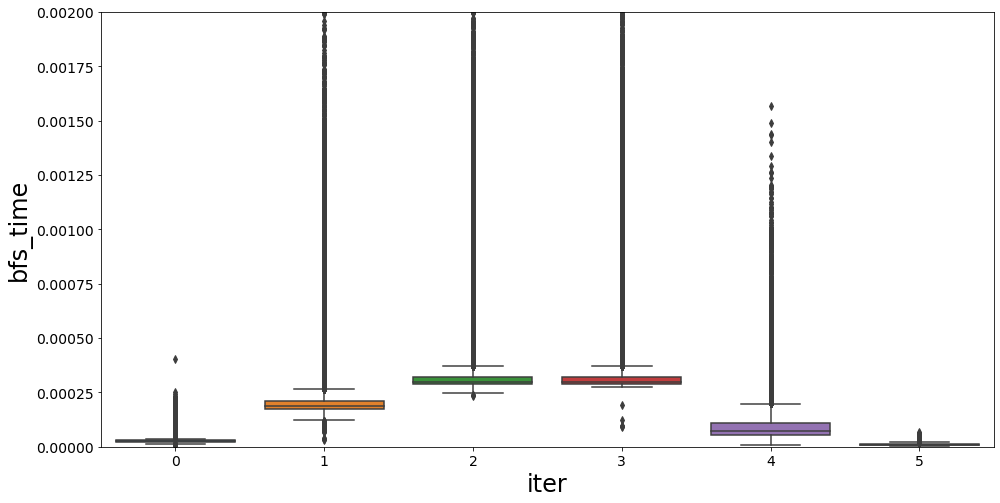

In [71]:
ax = sns.boxplot(y="bfs_time", x= "iter", data=debug_msbfs_df )
ax.set(ylim=(0.000, 0.002))

In [88]:
print("msbfs")
print(debug_msbfs_df['bfs_time'].sum(), debug_msbfs_df['full_time'].unique().sum())
print("full query")
print(debug_full_df['bfs_time'].sum(), debug_full_df['full_time'].unique().sum())

msbfs
32.697297 32.202819
full query
5.867552000000001 5.416389


<AxesSubplot:xlabel='batch_size', ylabel='count'>

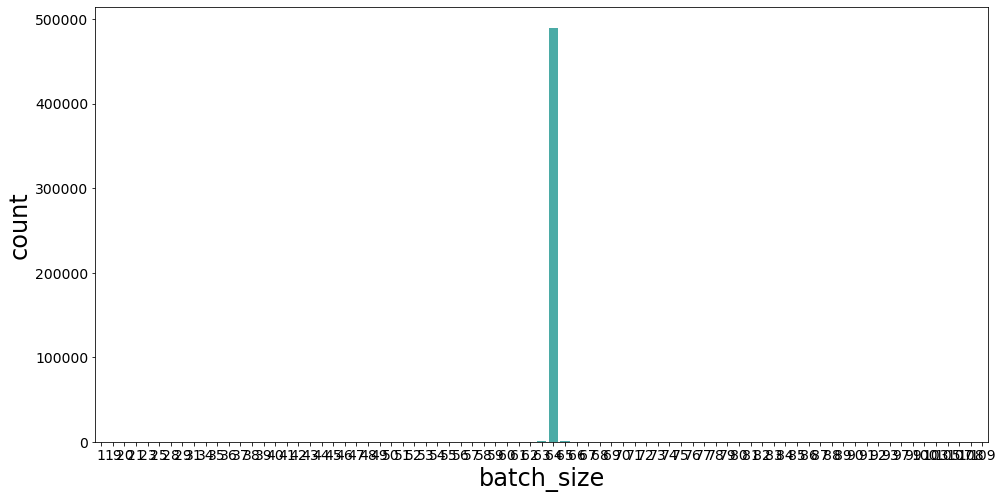

In [78]:
sns.countplot(x = "batch_size", data=debug_full_df)

In [90]:
debug_full_df["vector_size"].value_counts()

1024    166557
577        104
Name: vector_size, dtype: int64

In [91]:
debug_msbfs_df["vector_size"].value_counts()

1024    171284
577        110
Name: vector_size, dtype: int64

[(0.0, 0.002)]

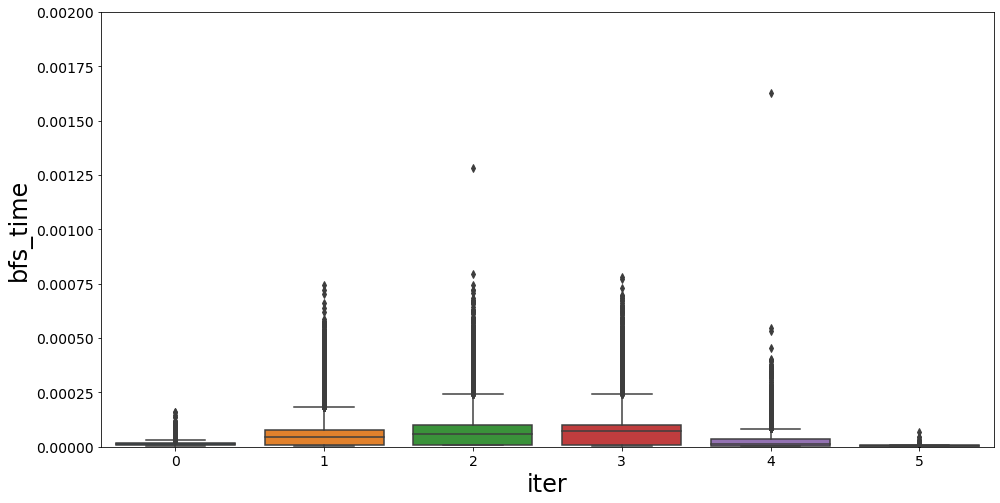

In [70]:
ax = sns.boxplot(y="bfs_time", x= "iter", data=debug_full_df )
ax.set(ylim=(0.000, 0.002))

<AxesSubplot:xlabel='batch_index', ylabel='bfs_time'>

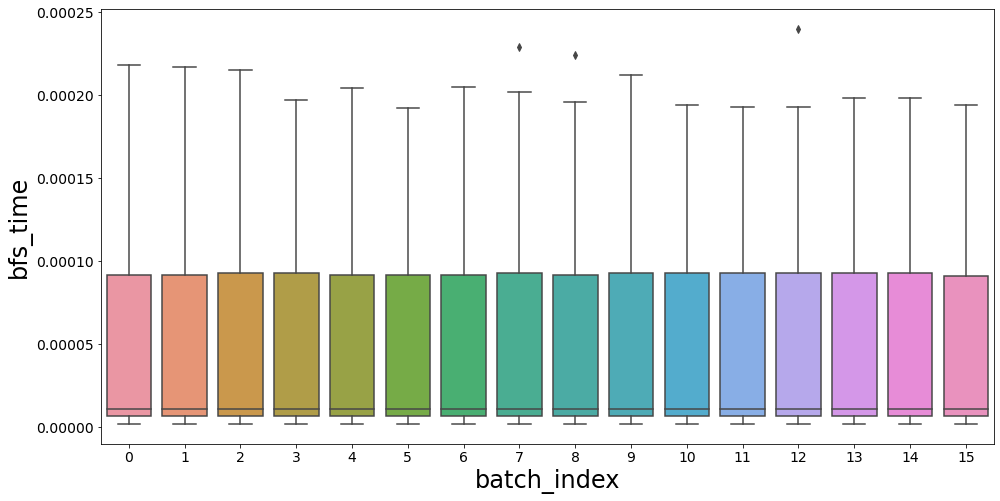

In [55]:
sns.boxplot(y="bfs_time", x= "batch_index", data=debug_df )

In [50]:
# debug_df[debug_df["lane_count"] == 16]
sns.lineplot(y="bfs_time", x= "call", ci="sd", data=debug_df, estimator=np.median )

ValueError: Could not interpret value `call` for parameter `x`

In [23]:
debug_df["bfs_time"].map(lambda x: float(x)).mean()

0.001835294110732338

In [20]:
debug_df["vector_size"].describe()

count     17014
unique        1
top        1000
freq      17014
Name: vector_size, dtype: object